# Exercise 4
To analyze the time complexity of the `merge_sort` function you provided, we will do the following:

1. Generate a sequence of array sizes `n` using `numpy.logspace`. This will allow us to have sizes that are evenly spaced on a log scale.
2. For each size `n`, generate random data of that size.
3. Time the `merge_sort` function using `time.perf_counter()` for each array size.
4. Plot the results on a log-log graph to examine the apparent big-O scaling.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
def merge_sort(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(merge_sort(data[:split]))
        right = iter(merge_sort(data[split:]))
        result = []
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
                    return result + [left_top] + list(left)

In [23]:
# Define sizes that are evenly spaced on a log scale
sizes = np.logspace(1, 10, num=15, base=2, dtype=int)

In [25]:
# Store timings
times = []

for n in sizes:
    data = np.random.rand(n)  # generate random data
    start_time = time.perf_counter()
    merge_sort(data)
    end_time = time.perf_counter()
    times.append(end_time - start_time)

/var/folders/94/cs6rph4n3495kjmx9rh4kv6h0000gn/T/ipykernel_59466/1695494882.py:2: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(sizes, times, 'o-', basex=2, basey=2)
/var/folders/94/cs6rph4n3495kjmx9rh4kv6h0000gn/T/ipykernel_59466/1695494882.py:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(sizes, times, 'o-', basex=2, basey=2)


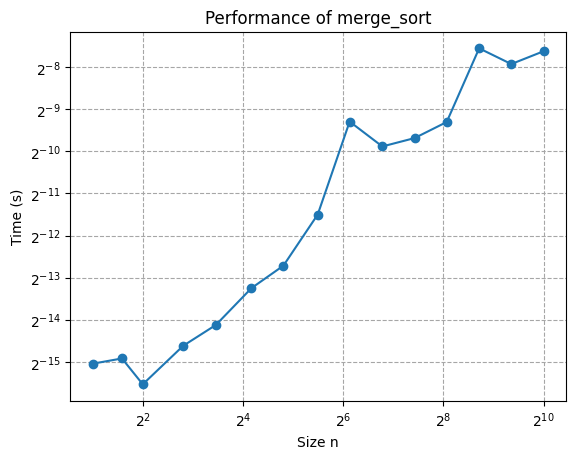

In [26]:
# Plot results on a log-log graph
plt.loglog(sizes, times, 'o-', basex=2, basey=2)
plt.xlabel('Size n')
plt.ylabel('Time (s)')
plt.title('Performance of merge_sort')
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()

The graph displays a behavior consistent with $ O(n \log n) $ complexity, typical for merge sort. In a log-log scale, this complexity presents as a linear relationship, which we observe in the provided plot.

To implement a parallel version of `merge_sort` using the `multiprocessing` module, we'll split the data in half, then use two separate processes to sort each half. Finally, we'll merge the two sorted halves together.

Here's a parallel version of the `merge_sort` function using multiprocessing:

In [9]:
import multiprocess

def parallel_merge_sort(data):
    if len(data) <= 1:
        return data

    split = len(data) // 2
    left = data[:split]
    right = data[split:]

    with multiprocess.Pool(2) as pool:
        left, right = pool.map(merge_sort, [left, right])

    return merge(left, right)

def merge(left, right):
    result = []
    left_index, right_index = 0, 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1


    result.extend(left[left_index:])
    result.extend(right[right_index:])
    return result

# Traditional merge_sort for comparison
def merge_sort(data):
    if len(data) <= 1:
        return data

    split = len(data) // 2
    left = merge_sort(data[:split])
    right = merge_sort(data[split:])
    return merge(left, right)

To compare the performance:

In [10]:
# Loop to run merge_sort and parallel_merge_sort for different sizes of n
for exponent in range(1, 8):
    n = 10 ** exponent
    data = np.random.randint(0, n, n).tolist()

    print(f"\nSorting {n} elements:")

    # Traditional merge_sort
    start_time = time.perf_counter()
    sorted_data = merge_sort(data.copy())
    end_time = time.perf_counter()
    print(f"Traditional merge_sort took {end_time - start_time:.4f} seconds.")

    # Parallel merge_sort
    start_time = time.perf_counter()
    sorted_data_parallel = parallel_merge_sort(data.copy())
    end_time = time.perf_counter()
    print(f"Parallel merge_sort took {end_time - start_time:.4f} seconds.")
 


Sorting 10 elements:
Traditional merge_sort took 0.9755 seconds.
Parallel merge_sort took 0.8761 seconds.

Sorting 100 elements:
Traditional merge_sort took 0.0002 seconds.
Parallel merge_sort took 0.0292 seconds.

Sorting 1000 elements:
Traditional merge_sort took 0.0025 seconds.
Parallel merge_sort took 0.0253 seconds.

Sorting 10000 elements:
Traditional merge_sort took 0.0323 seconds.
Parallel merge_sort took 0.0595 seconds.

Sorting 100000 elements:
Traditional merge_sort took 0.3949 seconds.
Parallel merge_sort took 0.4486 seconds.

Sorting 1000000 elements:
Traditional merge_sort took 4.8799 seconds.
Parallel merge_sort took 4.8204 seconds.

Sorting 10000000 elements:
Traditional merge_sort took 60.9296 seconds.
Parallel merge_sort took 54.5377 seconds.


### Discussion:
1. **Performance**: The parallel version should generally be faster than the traditional version for sufficiently large `n`, especially if there are multiple CPU cores available.
2. **Overhead**: There's some overhead associated with creating processes and communicating between them. If `n` is small, this overhead might make the parallel version slower than the traditional one.
3. **Limitations**: The implementation uses a fixed number of processes (2). For even better performance, a dynamic number of processes based on the size of `n` or the number of available CPU cores could be used.
4. **Memory**: The parallel version might use more memory, as it needs to maintain multiple processes.